### Ovärlds Analys

In [1]:
import numpy as np
import pandas as pd

#Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

In [2]:
train_df  = pd.read_csv('sign_mnist_train.csv')
test_df  = pd.read_csv('sign_mnist_test.csv')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


In [9]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


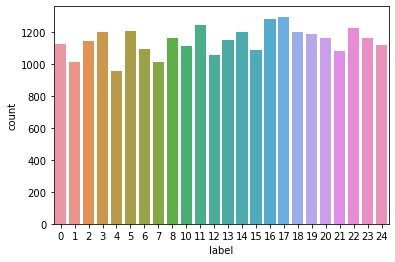

In [10]:
# Data distribution visualization

sns.countplot(x= train_df['label'])
plt.show()

Text(0.5, 1.0, 'Label')

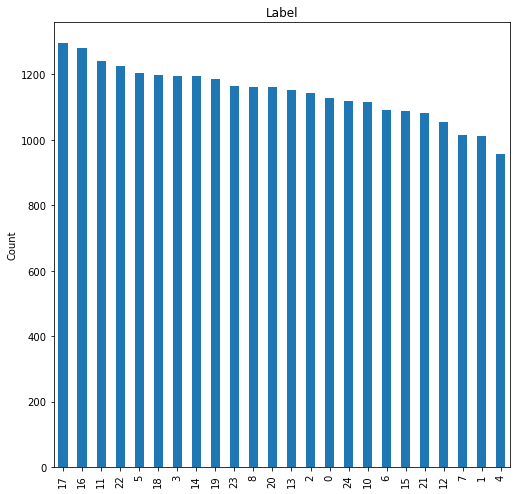

In [11]:
# class 4 has the lowest example and it might couse us problem but data is fairly distributed

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train_df['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [12]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(train_df['label'])
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [13]:
classes = np.unique(train_df["label"])
classes_number = len(classes)
print(classes_number)

24


### Data cleaning

In [14]:
train_df.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [16]:
train = train_df.drop_duplicates()
test  = test_df.drop_duplicates()

### Problemformulering och Preprocesing

In [22]:
orig_labels = train_df['label']
y_train = tf.keras.utils.to_categorical(orig_labels) # one-hot encoding
train_df.drop('label', axis=1, inplace=True)
train_df.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202


In [23]:
original_labels = test_df['label']
y_test = tf.keras.utils.to_categorical(original_labels) # one-hot encoding
test_df.drop('label', axis=1, inplace=True)
test_df.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107


In [24]:
train_arr = np.array(train_df).reshape(-1, 28, 28, 1)

In [25]:
test_arr = np.array(test_df).reshape(-1, 28, 28, 1)

In [26]:
train_arr.shape

(27455, 28, 28, 1)

In [27]:
test_arr.shape

(7172, 28, 28, 1)

In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def change_size(image):
    img = array_to_img(image, scale=False) #returns PIL Image
    img = img.resize((75, 75)) #resize image
    img = img.convert(mode='RGB') #makes 3 channels
    arr = img_to_array(img) #convert back to array
    return arr.astype(np.float64)

In [30]:
train_arr_75 = [change_size(img) for img in train_arr]
del train_arr
train_arr_75 = np.array(train_arr_75)
train_arr_75.shape

(27455, 75, 75, 3)

In [31]:
test_arr_75 = [change_size(img) for img in test_arr]
del test_arr
test_arr_75 = np.array(test_arr_75)
test_arr_75.shape

(7172, 75, 75, 3)

In [32]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1  # randomly shift images vertically (fraction of total height)
)


new_data = datagen.fit(train_arr_75)

In [33]:
model = Sequential()

model.add(tf.keras.applications.resnet50.ResNet50(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet'))
model.add(L.Flatten())
model.add(L.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(L.Dense(25, activation ='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
Total params: 24,769,049
Trainable params: 24,715,929
Non-trainable params: 53,120
_________________________________________________________________


In [35]:
for layer in model.layers[0].layers:
    if layer.name == 'conv5_block3_3_conv':
        break
    layer.trainable=False

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
Total params: 24,769,049
Trainable params: 2,236,057
Non-trainable params: 22,532,992
_________________________________________________________________


In [37]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
Earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
callbacks = [learning_rate_reduction, Earlystopping]

In [38]:
history = model.fit(datagen.flow(train_arr_75,y_train, batch_size = 128) ,epochs = 10 , validation_data = (test_arr_75, y_test), callbacks = callbacks)

Epoch 1/10
215/215 [==============================] - 1305s 6s/step - loss: 0.4279 - accuracy: 0.8732 - val_loss: 0.1191 - val_accuracy: 0.9636 - lr: 1.0000e-04
Epoch 2/10
215/215 [==============================] - 1261s 6s/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.1053 - val_accuracy: 0.9706 - lr: 1.0000e-04
Epoch 3/10
215/215 [==============================] - 1269s 6s/step - loss: 0.0182 - accuracy: 0.9952 - val_loss: 0.0032 - val_accuracy: 0.9983 - lr: 1.0000e-04
Epoch 4/10
215/215 [==============================] - 1264s 6s/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0309 - val_accuracy: 0.9932 - lr: 1.0000e-04
Epoch 5/10
215/215 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9963
Epoch 00005: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
215/215 [==============================] - 1269s 6s/step - loss: 0.0155 - accuracy: 0.9963 - val_loss: 0.0078 - val_accuracy: 0.9979 - lr: 1.0000e-04


In [39]:
# Save our Model
model.save("sign_mnist_ResNet.h5")
print("Model Saved")

C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Model Saved


In [42]:
print("Accuracy of the model is - " , model.evaluate(test_arr_75,y_test)[1]*100 , "%")

225/225 [==============================] - 57s 251ms/step - loss: 0.0032 - accuracy: 0.9983
Accuracy of the model is -  99.832683801651 %


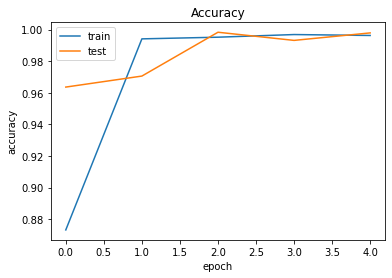

In [44]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [3]:
model = keras.models.load_model('C:/Users/dadme/Desktop/Data science/sign language project/New folder/sign_mnist_ResNet.h5')

In [4]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [5]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (75, 75), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,75,75,1) 

    result = str(np.argmax(model.predict(roi, 1, verbose = 0)[0]))
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

ValueError: in user code:

    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\dadme\anaconda3\envs\ml\lib\site-packages\keras\engine\input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "resnet50" (type Functional).
    
    Input 0 of layer "conv1_conv" is incompatible with the layer: expected axis -1of input shape to have value 3, but received input with shape (1, 81, 81, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(1, 75, 75, 1), dtype=float32)
      • training=False
      • mask=None
